In [3]:
import warnings
warnings.filterwarnings('ignore')

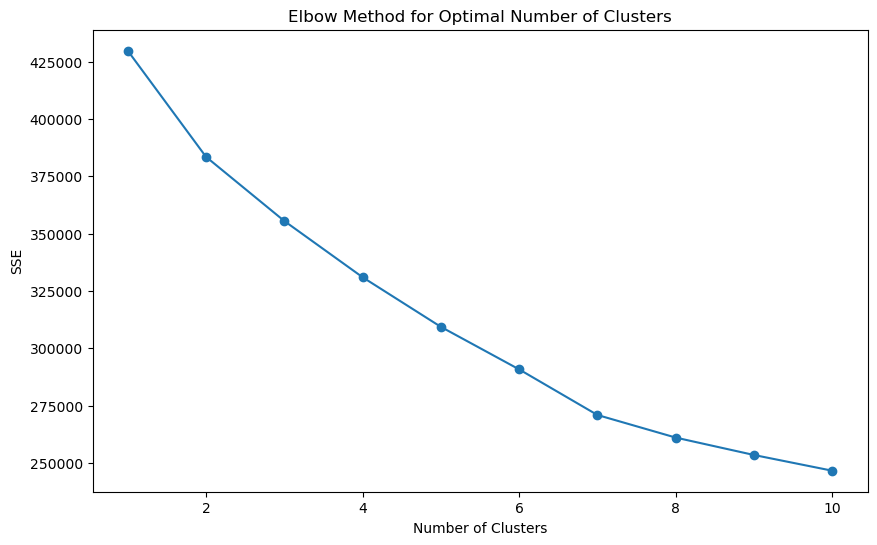

         CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
Cluster                                                             
0          -0.085688     -0.031318        -0.010566      1.502206   
1           0.861212      0.898738        -0.082453     -0.315054   
2          -0.538784     -0.590014         0.060549     -0.505452   

         NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
Cluster                                                              
0                0.187660            -0.073248           -0.454927   
1                0.157337            -0.167372           -0.187497   
2               -0.195544             0.147651            0.343506   

         NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
Cluster                                                               
0                 0.057901         0.077185   -0.047658    0.036871   
1                 0.096714         0.150250    0.040717    0.111109   
2                -0

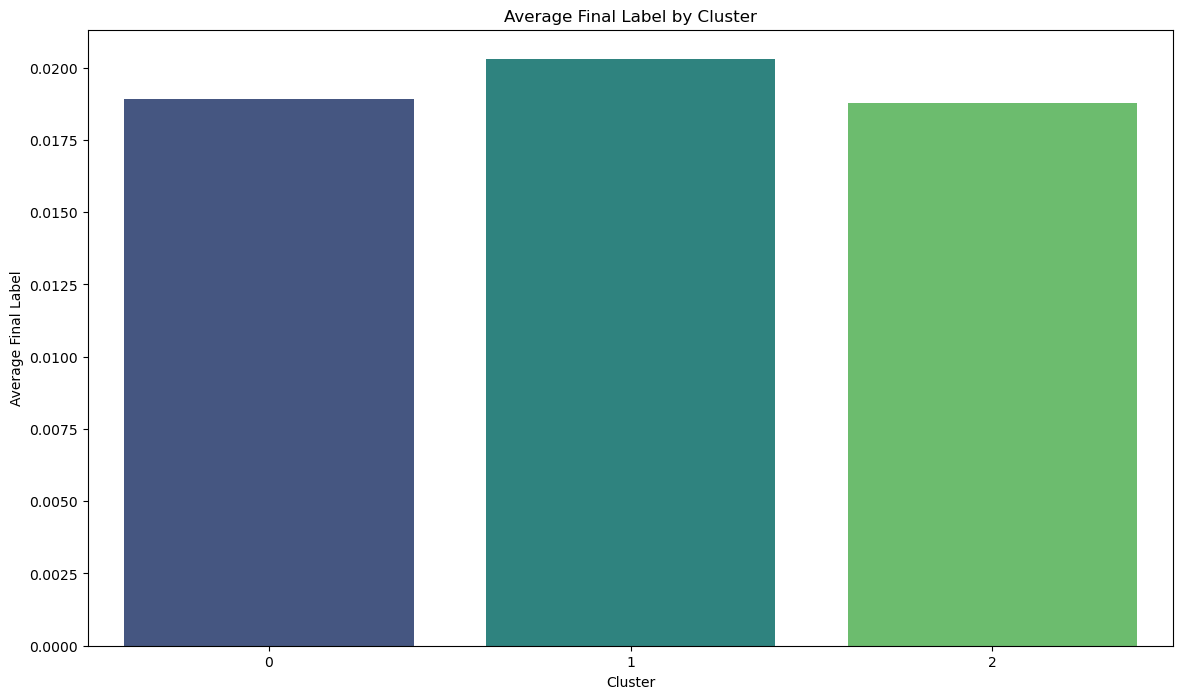

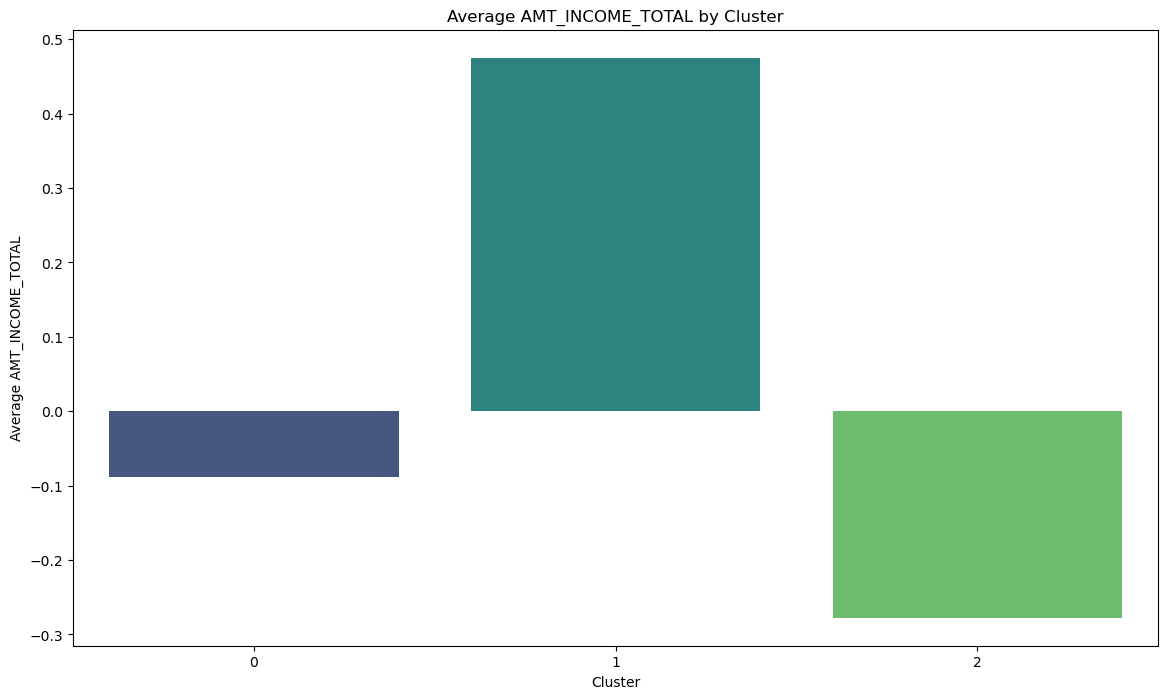

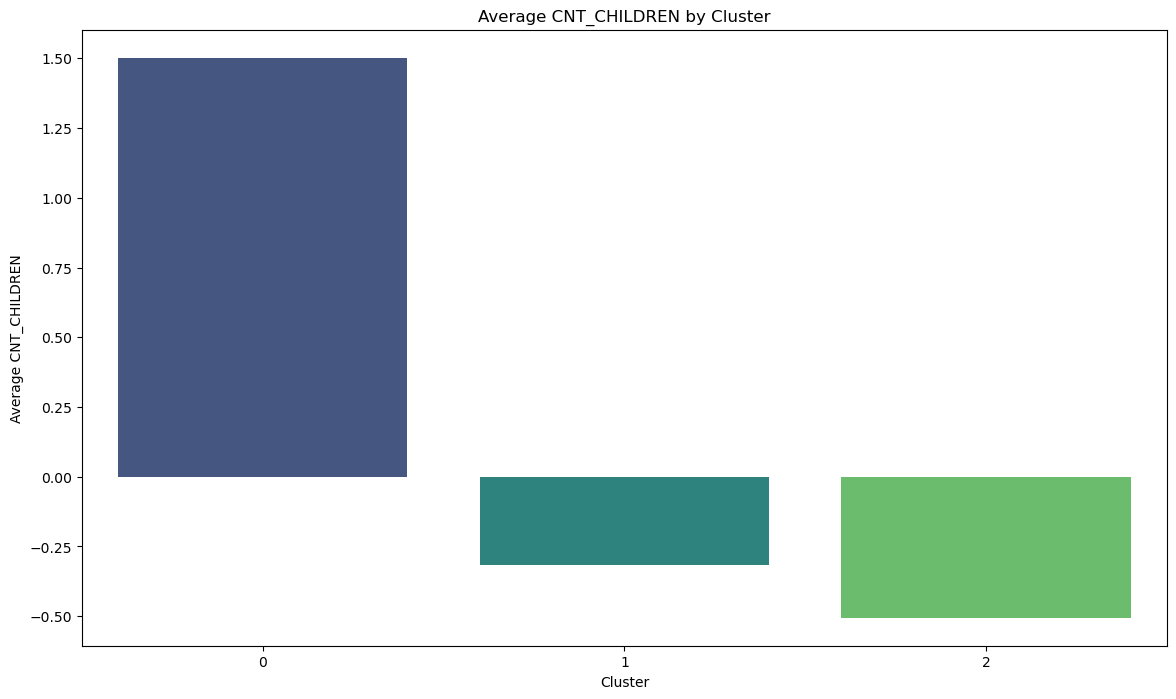

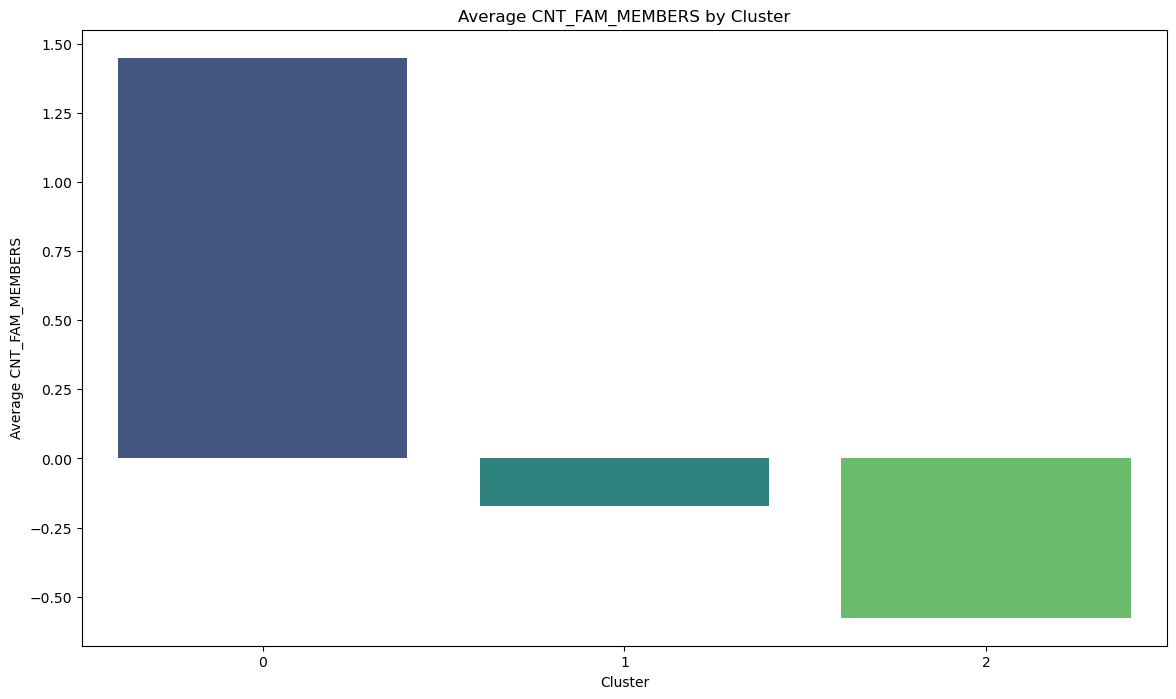

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('FINAL_DATASET.csv')

# Select relevant features for clustering and regression
features = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL'
]
target = 'FINAL_LABEL'

# Extract the relevant features and target
data_selected = data[features + [target]]

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(data_selected)

# Encode categorical variables
label_encoders = {}
for column in range(data_imputed.shape[1] - 1):  # Exclude target column
    if isinstance(data_imputed[0, column], str):
        le = LabelEncoder()
        data_imputed[:, column] = le.fit_transform(data_imputed[:, column])
        label_encoders[column] = le

# Standardize the data (excluding the target column)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed[:, :-1])

# Combine scaled features and target
data_processed = np.hstack((data_scaled, data_imputed[:, -1].reshape(-1, 1)))

# Convert back to DataFrame for easier handling
data_processed = pd.DataFrame(data_processed, columns=features + [target])

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Apply K-Means clustering with the optimal number of clusters (let's assume 3 for this example)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data_processed['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze the clusters
cluster_summary = data_processed.groupby('Cluster').mean()
print(cluster_summary)

# Plot average values of key features for each cluster
plt.figure(figsize=(14, 8))
sns.barplot(x=cluster_summary.index, y=cluster_summary['FINAL_LABEL'], palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Average Final Label')
plt.title('Average Final Label by Cluster')
plt.show()

# Additional plots for other key features
key_features = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
for feature in key_features:
    plt.figure(figsize=(14, 8))
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], palette='viridis')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.title(f'Average {feature} by Cluster')
    plt.show()
